# SmartBudget AI: Dashboard Cerdas untuk Simulasi Anggaran dan Analisis Pengeluaran Berbasis Machine Learning
- **Nama:** Juan Hubert Liem
- **Email:** juanhl8010@gmail.com
- **ID Dicoding:** b25b9d052
- **ID Group Capstone:** DB9-I018

# **Menentukan Pertanyaan Bisnis**
1. Bagaimana dashboard simulasi keuangan dapat membantu pengguna dalam mengontrol pola pengeluaran dan meningkatkan kemampuan manajemen keuangan pribadi?

2. Bagaimana penerapan machine learning dalam menganalisis pola pengeluaran dapat memberikan rekomendasi finansial yang membantu pengguna membuat keputusan keuangan yang lebih bijak?

# **Import Packages/Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("data.csv")
df

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,...,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466178,51,4,Self_Employed,Tier_1,12274.039853,7703.854895,1646.799940,5477.403246,2084.230191,...,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833325,44.900294,98.765527,190.591917
19996,90295.772638,21,1,Student,Tier_2,18059.154528,0.000000,2770.589626,13118.222419,4633.108332,...,10613.589598,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046
19997,40604.567373,30,1,Professional,Tier_2,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,...,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277
19998,118157.817240,27,2,Professional,Tier_1,35447.345172,12345.910538,4735.672471,16392.438426,8248.242279,...,10603.684814,10603.684814,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012,569.811212


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [ ]:
df.isna().sum()

,0
Income,0
Age,0
Dependents,0
Occupation,0
City_Tier,0
Rent,0
Loan_Repayment,0
Insurance,0
Groceries,0
Transport,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
INR_TO_IDR = 190
float_cols = df.select_dtypes(include='float64').columns
df[float_cols] = df[float_cols] * INR_TO_IDR

In [ ]:
df = df.rename(columns={col: col + '_IDR' for col in float_cols})
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
df.head()

,Income_IDR,Age,Dependents,Occupation,City_Tier,Rent_IDR,Loan_Repayment_IDR,Insurance_IDR,Groceries_IDR,Transport_IDR,...,Desired_Savings_IDR,Disposable_Income_IDR,Potential_Savings_Groceries_IDR,Potential_Savings_Transport_IDR,Potential_Savings_Eating_Out_IDR,Potential_Savings_Entertainment_IDR,Potential_Savings_Utilities_IDR,Potential_Savings_Healthcare_IDR,Potential_Savings_Education_IDR,Potential_Savings_Miscellaneous_IDR
0,"8,481,077",49,0,Self_Employed,Tier_1,"2,544,323",0,"419,233","1,265,166","501,024",...,"1,178,102","2,140,469","320,282","62,490","88,496","37,079","128,876","12,860",0,"16,290"
1,"5,103,133",34,2,Retired,Tier_2,"1,020,627",0,"165,209","535,504","293,174",...,"365,404","1,838,596","102,658","22,676","26,955","44,485","54,467","1,255","10,698","18,504"
2,"9,569,845",35,1,Student,Tier_3,"1,435,477","876,300","418,342","1,199,512","612,065",...,"1,339,568","2,639,376","278,554","89,974","78,063","87,393","92,793","1,385","20,264","26,323"
3,"19,276,564",21,0,Self_Employed,Tier_3,"2,891,485","1,293,794","928,989","2,791,128","1,350,165",...,"3,172,043","6,007,411","356,427","144,784","235,793","60,836","264,065","36,766",0,"56,248"
4,"4,726,304",52,4,Professional,Tier_2,"945,261","591,396","120,822","576,523","242,469",...,"356,079","1,190,483","149,901","12,951","11,725","35,563","36,882","8,986","12,804","18,346"


In [ ]:
df.describe()

,Income_IDR,Age,Dependents,Rent_IDR,Loan_Repayment_IDR,Insurance_IDR,Groceries_IDR,Transport_IDR,Eating_Out_IDR,Entertainment_IDR,...,Desired_Savings_IDR,Disposable_Income_IDR,Potential_Savings_Groceries_IDR,Potential_Savings_Transport_IDR,Potential_Savings_Eating_Out_IDR,Potential_Savings_Entertainment_IDR,Potential_Savings_Utilities_IDR,Potential_Savings_Healthcare_IDR,Potential_Savings_Education_IDR,Potential_Savings_Miscellaneous_IDR
count,"20,000","20,000","20,000","20,000","20,000","20,000","20,000","20,000","20,000","20,000",...,"20,000","20,000","20,000","20,000","20,000","20,000","20,000","20,000","20,000","20,000"
mean,"7,901,244",41,2,"1,731,944","389,462","276,455","989,077","513,849","277,753","275,282",...,"946,747","2,023,000","173,317","89,878","48,443","48,266","82,903","7,890","11,859","27,532"
std,"7,602,763",14,1,"1,758,303","813,540","283,658","956,831","506,606","281,516","282,914",...,"1,469,359","2,230,721","197,388","102,072","56,249","56,995","95,608","10,099","18,780","32,141"
min,"247,226",18,0,"44,719",0,"5,700","29,275","15,433","7,493","8,630",...,0,"-1,026,150","3,149","1,571",722,593,"1,178",0,0,397
25%,"3,344,926",29,1,"693,390",0,"110,239","411,431","213,670","110,392","110,510",...,"232,737","717,230","60,384","30,764","16,056","16,067","28,123","2,097",936,"9,051"
50%,"5,735,223",41,2,"1,216,523",0,"193,254","710,807","367,431","195,531","193,838",...,"409,518","1,372,729","115,337","58,339","31,336","31,301","54,291","4,788","6,294","17,687"
75%,"9,835,435",53,3,"2,140,149","499,157","339,561","1,229,470","638,514","343,344","340,120",...,"1,181,099","2,533,071","214,450","111,800","59,546","59,076","102,407","9,947","15,380","33,869"
max,"205,148,391",64,4,"41,029,678","23,385,330","7,359,637","22,765,211","15,553,686","6,537,159","7,346,800",...,"46,645,852","71,641,442","6,629,982","2,331,919","1,058,877","1,182,218","1,535,542","264,961","692,976","881,211"


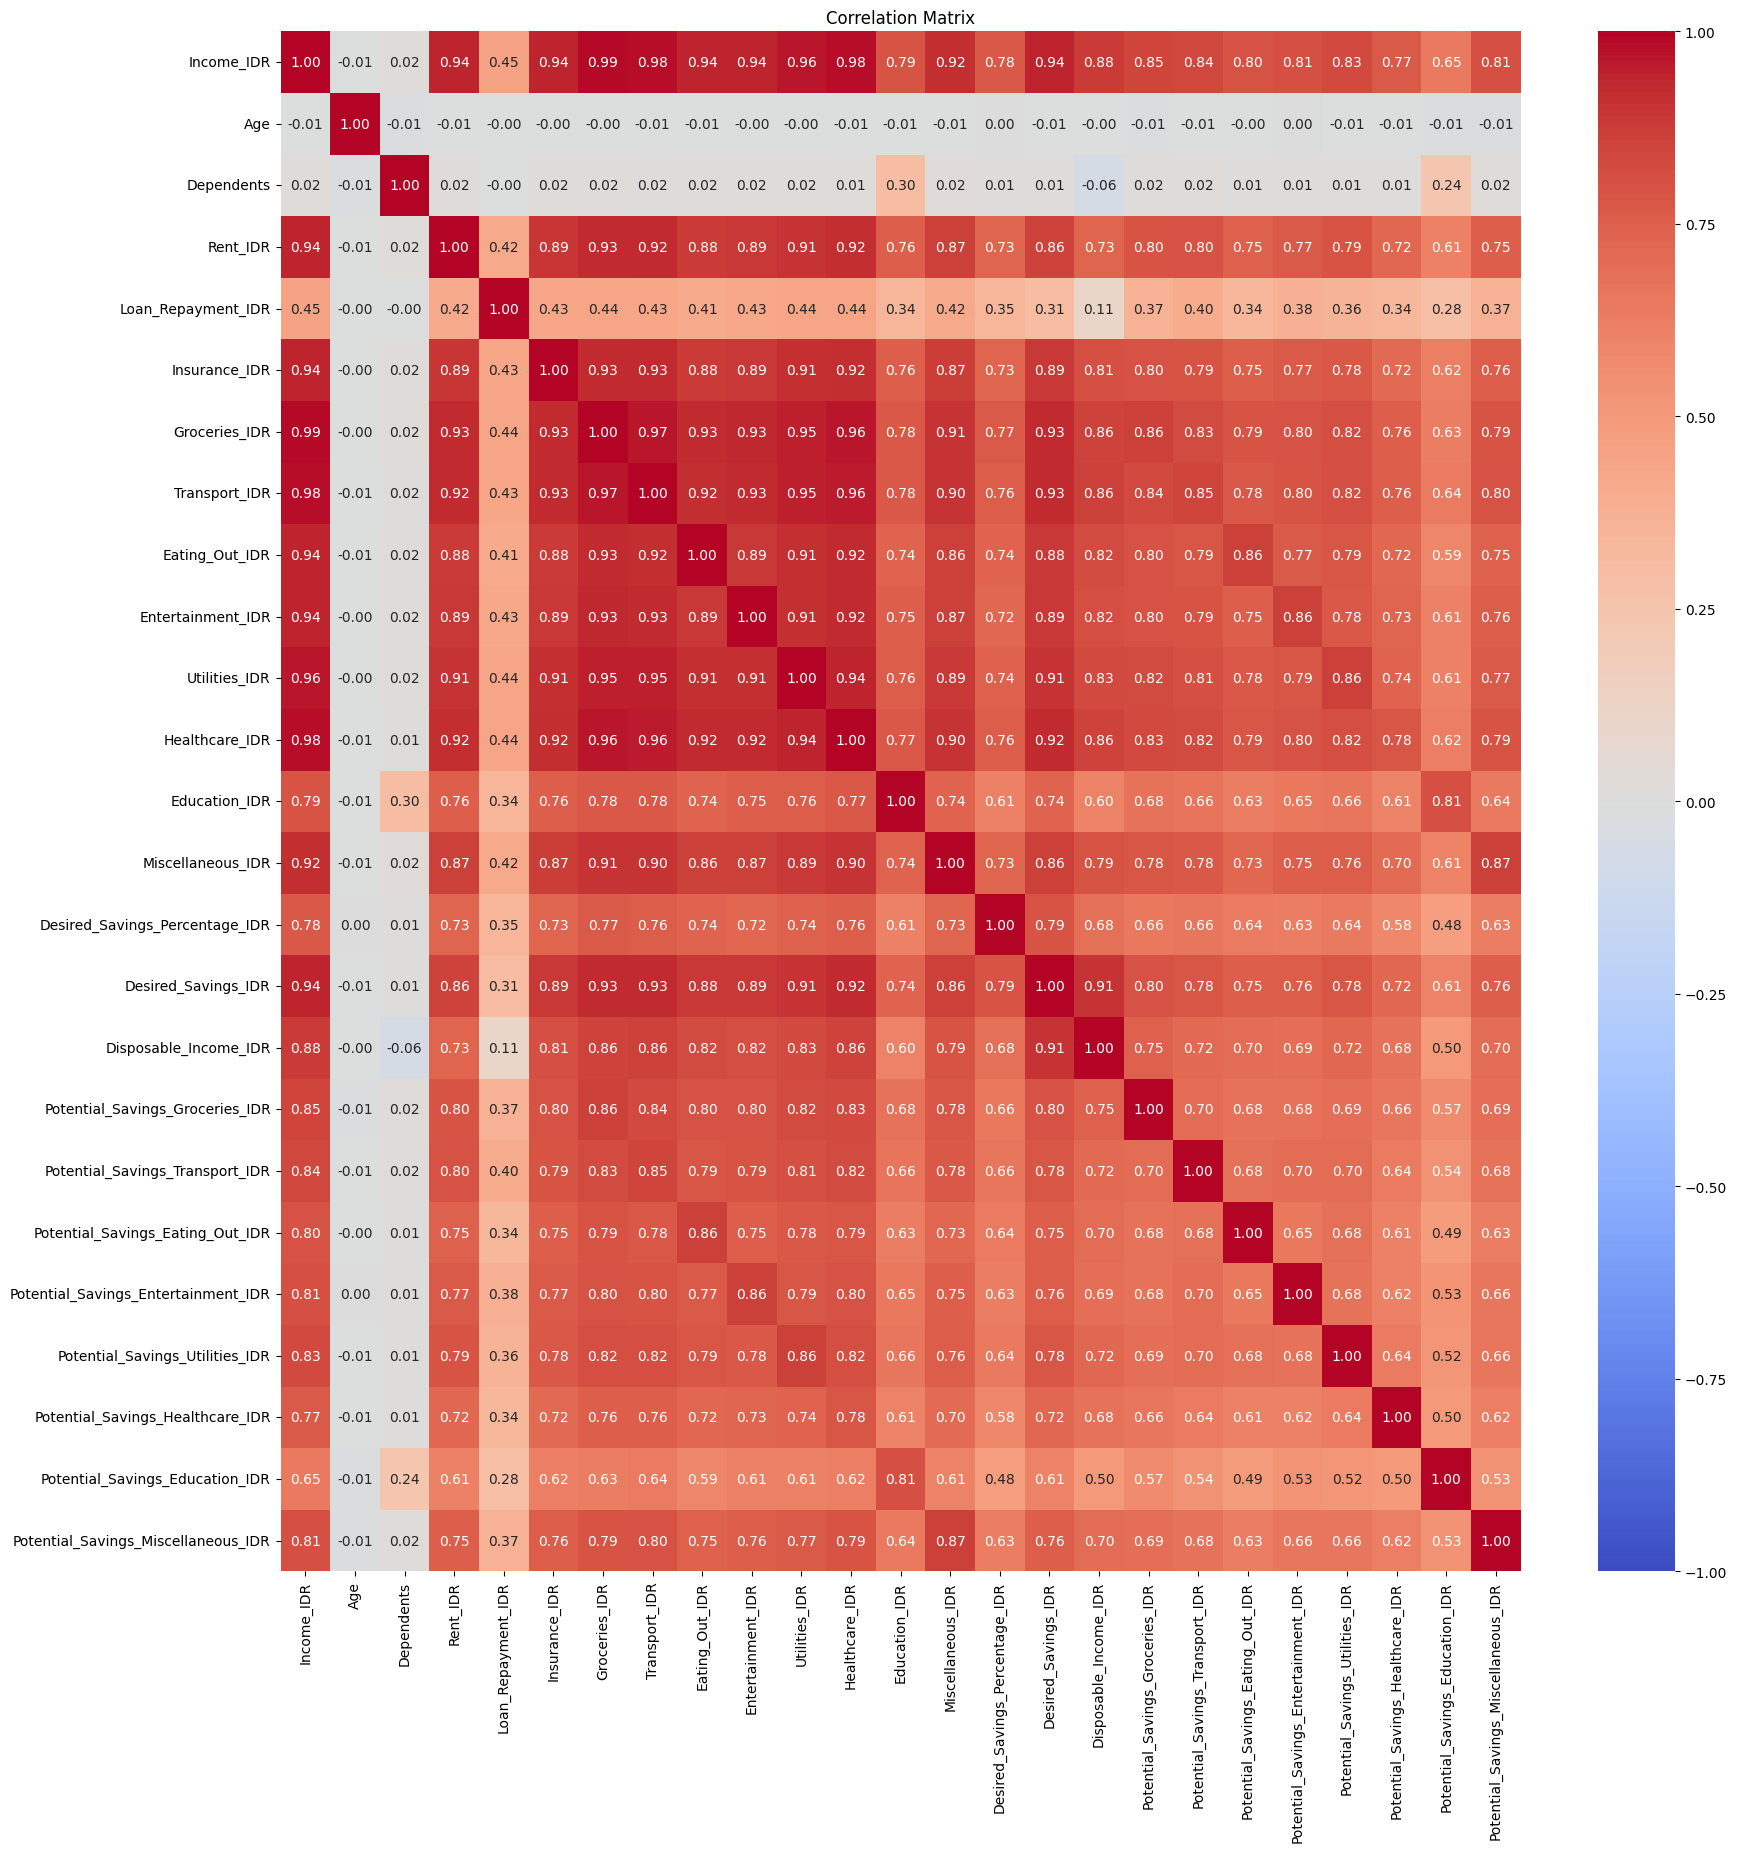

In [ ]:

numerical_cols = df.select_dtypes(include=['number']).columns
correlation = df[numerical_cols].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation,
               annot=True,
               cmap='coolwarm',
               fmt=".2f",
               vmin=-1,
               vmax=1)
plt.title('Correlation Matrix')
plt.show()


# **CLUSTERING**

In [ ]:
df_cluster = df.copy()
df_cluster.head()

,Income_IDR,Age,Dependents,Occupation,City_Tier,Rent_IDR,Loan_Repayment_IDR,Insurance_IDR,Groceries_IDR,Transport_IDR,...,Desired_Savings_IDR,Disposable_Income_IDR,Potential_Savings_Groceries_IDR,Potential_Savings_Transport_IDR,Potential_Savings_Eating_Out_IDR,Potential_Savings_Entertainment_IDR,Potential_Savings_Utilities_IDR,Potential_Savings_Healthcare_IDR,Potential_Savings_Education_IDR,Potential_Savings_Miscellaneous_IDR
0,"8,481,077",49,0,Self_Employed,Tier_1,"2,544,323",0,"419,233","1,265,166","501,024",...,"1,178,102","2,140,469","320,282","62,490","88,496","37,079","128,876","12,860",0,"16,290"
1,"5,103,133",34,2,Retired,Tier_2,"1,020,627",0,"165,209","535,504","293,174",...,"365,404","1,838,596","102,658","22,676","26,955","44,485","54,467","1,255","10,698","18,504"
2,"9,569,845",35,1,Student,Tier_3,"1,435,477","876,300","418,342","1,199,512","612,065",...,"1,339,568","2,639,376","278,554","89,974","78,063","87,393","92,793","1,385","20,264","26,323"
3,"19,276,564",21,0,Self_Employed,Tier_3,"2,891,485","1,293,794","928,989","2,791,128","1,350,165",...,"3,172,043","6,007,411","356,427","144,784","235,793","60,836","264,065","36,766",0,"56,248"
4,"4,726,304",52,4,Professional,Tier_2,"945,261","591,396","120,822","576,523","242,469",...,"356,079","1,190,483","149,901","12,951","11,725","35,563","36,882","8,986","12,804","18,346"


In [ ]:
money_cols = [
    'Income_IDR', 'Rent_IDR', 'Loan_Repayment_IDR', 'Insurance_IDR',
    'Groceries_IDR', 'Transport_IDR', 'Eating_Out_IDR',
    'Entertainment_IDR', 'Utilities_IDR', 'Healthcare_IDR',
    'Education_IDR', 'Miscellaneous_IDR', 'Disposable_Income_IDR'
]

for col in money_cols:
    df_cluster[col] = (
        df_cluster[col]
        .astype(str)
        .str.replace(',', '', regex=False)
        .astype(float)
    )


In [ ]:
df_cluster.head()

,Income_IDR,Age,Dependents,Occupation,City_Tier,Rent_IDR,Loan_Repayment_IDR,Insurance_IDR,Groceries_IDR,Transport_IDR,...,Desired_Savings_IDR,Disposable_Income_IDR,Potential_Savings_Groceries_IDR,Potential_Savings_Transport_IDR,Potential_Savings_Eating_Out_IDR,Potential_Savings_Entertainment_IDR,Potential_Savings_Utilities_IDR,Potential_Savings_Healthcare_IDR,Potential_Savings_Education_IDR,Potential_Savings_Miscellaneous_IDR
0,"8,481,077",49,0,Self_Employed,Tier_1,"2,544,323",0,"419,233","1,265,166","501,024",...,"1,178,102","2,140,469","320,282","62,490","88,496","37,079","128,876","12,860",0,"16,290"
1,"5,103,133",34,2,Retired,Tier_2,"1,020,627",0,"165,209","535,504","293,174",...,"365,404","1,838,596","102,658","22,676","26,955","44,485","54,467","1,255","10,698","18,504"
2,"9,569,845",35,1,Student,Tier_3,"1,435,477","876,300","418,342","1,199,512","612,065",...,"1,339,568","2,639,376","278,554","89,974","78,063","87,393","92,793","1,385","20,264","26,323"
3,"19,276,564",21,0,Self_Employed,Tier_3,"2,891,485","1,293,794","928,989","2,791,128","1,350,165",...,"3,172,043","6,007,411","356,427","144,784","235,793","60,836","264,065","36,766",0,"56,248"
4,"4,726,304",52,4,Professional,Tier_2,"945,261","591,396","120,822","576,523","242,469",...,"356,079","1,190,483","149,901","12,951","11,725","35,563","36,882","8,986","12,804","18,346"


In [ ]:
expense_cols = [
    'Rent_IDR','Loan_Repayment_IDR','Insurance_IDR','Groceries_IDR',
    'Transport_IDR','Eating_Out_IDR','Entertainment_IDR','Utilities_IDR',
    'Healthcare_IDR','Education_IDR','Miscellaneous_IDR'
]

df_cluster['Total_Expense_IDR'] = df_cluster[expense_cols].sum(axis=1)

df_cluster['Expense_Ratio'] = df_cluster['Total_Expense_IDR'] / df_cluster['Income_IDR']
df_cluster['Rent_Ratio'] = df_cluster['Rent_IDR'] / df_cluster['Income_IDR']
df_cluster['Groceries_Ratio'] = df_cluster['Groceries_IDR'] / df_cluster['Income_IDR']
df_cluster['Entertainment_Ratio'] = df_cluster['Entertainment_IDR'] / df_cluster['Income_IDR']
df_cluster['EatingOut_Ratio'] = df_cluster['Eating_Out_IDR'] / df_cluster['Income_IDR']
df_cluster['Savings_Ratio'] = df_cluster['Disposable_Income_IDR'] / df_cluster['Income_IDR']


In [ ]:
pd.reset_option('display.float_format')

In [ ]:
df_cluster[
    ['Expense_Ratio','Rent_Ratio','Groceries_Ratio','Savings_Ratio']
].describe()


,Expense_Ratio,Rent_Ratio,Groceries_Ratio,Savings_Ratio
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.744878,0.219675,0.125261,0.255122
std,0.097190,0.055496,0.014438,0.097190
min,0.493496,0.150000,0.100001,-0.062378
25%,0.672324,0.200000,0.112653,0.189708
50%,0.735113,0.200000,0.125418,0.264887
75%,0.810292,0.300000,0.137830,0.327676
max,1.062378,0.300000,0.149999,0.506504


In [ ]:
features = [
    'Expense_Ratio',
    'Rent_Ratio',
    'Groceries_Ratio',
    'Entertainment_Ratio',
    'EatingOut_Ratio',
    'Savings_Ratio'
]

X = df_cluster[features]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

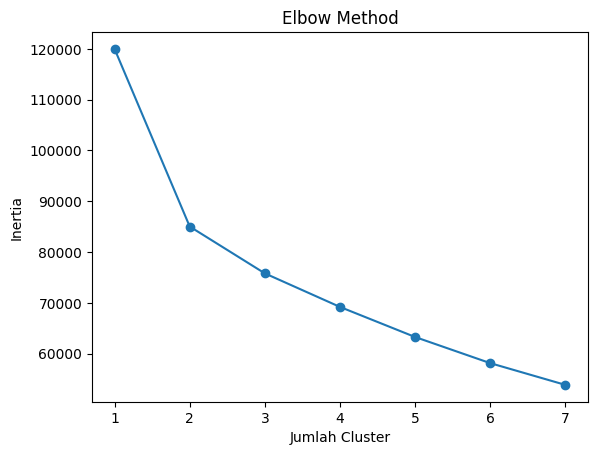

In [ ]:
inertia = []

for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 8), inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
cluster_summary = df_cluster.groupby('Cluster')[features].mean()
cluster_summary


,Expense_Ratio,Rent_Ratio,Groceries_Ratio,Entertainment_Ratio,EatingOut_Ratio,Savings_Ratio
Cluster,,,,,,
0,0.677820,0.185244,0.124205,0.034535,0.034793,0.322180
1,0.832048,0.264432,0.126634,0.035369,0.035462,0.167952


In [ ]:
boros_cluster = cluster_summary['Expense_Ratio'].idxmax()

df_cluster['Spending_Label'] = df_cluster['Cluster'].apply(
    lambda x: 'Boros' if x == boros_cluster else 'Hemat'
)


In [ ]:
df_cluster['Spending_Label'].value_counts(normalize=True) * 100


,proportion
Spending_Label,
Hemat,56.52
Boros,43.48


In [ ]:
df_cluster.groupby('Spending_Label')[[
    'Expense_Ratio',
    'Savings_Ratio',
    'Entertainment_Ratio'
]].mean()


,Expense_Ratio,Savings_Ratio,Entertainment_Ratio
Spending_Label,,,
Boros,0.832048,0.167952,0.035369
Hemat,0.677820,0.322180,0.034535


# **Klasifikasi**

In [ ]:
y = df_cluster['Spending_Label']

In [ ]:
features = [
    'Expense_Ratio',
    'Rent_Ratio',
    'Groceries_Ratio',
    'Entertainment_Ratio',
    'EatingOut_Ratio',
    'Savings_Ratio'
]

X = df_cluster[features]


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

le.classes_

array(['Boros', 'Hemat'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.999
[[1738    1]
 [   3 2258]]
              precision    recall  f1-score   support

       Boros       1.00      1.00      1.00      1739
       Hemat       1.00      1.00      1.00      2261

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



# **Rekomendasi Penghematan**

In [ ]:
y = df_cluster['Savings_Ratio']
features_reg = [
    'Income_IDR',
    'Rent_Ratio',
    'Groceries_Ratio',
    'Entertainment_Ratio',
    'EatingOut_Ratio',
    'Expense_Ratio'
]

X = df_cluster[features_reg]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

reg_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = reg_model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2: 0.9999992123987848
MAE: 2.3908404204634074e-05
